In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

     
import utils.paths as path

In [32]:
data_dir = path.make_dir_function("data")

In [33]:
df = pd.read_csv(data_dir("processed","df_forcluster.csv"))

In [34]:
df_transformed = df.copy()

## Transformacion de datos 

In [35]:
columns_to_transform = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
df_transformed['Fruits'] = df_transformed['Fruits'].apply(lambda x: np.tanh(x/15))
df_transformed['Meat'] = df_transformed['Meat'].apply(lambda x: np.tanh(x/150))
df_transformed['Wines'] = df_transformed['Wines'].apply(lambda x: np.tanh(x/300))
df_transformed['Gold'] = df_transformed['Gold'].apply(lambda x: np.tanh(x/65))
df_transformed['Sweets'] = df_transformed['Sweets'].apply(lambda x: np.tanh(x/19.5))
df_transformed['Fish'] = df_transformed['Fish'].apply(lambda x: np.tanh(x/12))
df_transformed = pd.get_dummies(df_transformed,columns=['Marital_Status','Education'],drop_first=True)

## Escalamiento de datos para modelo cluster

In [36]:
scaler = StandardScaler()

In [37]:
df_scaled = scaler.fit_transform(df_transformed)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_transformed.columns

## PCA para los datos 

In [38]:
pca = PCA()
pca.fit(df_scaled)
df_pca_scaled = pca.transform(df_scaled)
df_pca_standard = pd.DataFrame(df_pca_scaled)
     

# Cluster kmeans 

In [39]:
suma_cuadrados = []
sil_score = []
k = range(2,18)
for i in k:
    kmeans = KMeans(n_clusters=i,n_init=10)
    y = kmeans.fit_predict(df_pca_standard)
    suma_cuadrados.append(kmeans.inertia_)
    sil_score.append(silhouette_score(df_pca_standard,y))

In [40]:
kmeans = KMeans(n_clusters=3,n_init=10)
y= kmeans.fit_predict(df_pca_standard)
print(silhouette_score(df_pca_standard,y))
df['segmentacion'] = y

0.14427425686262751


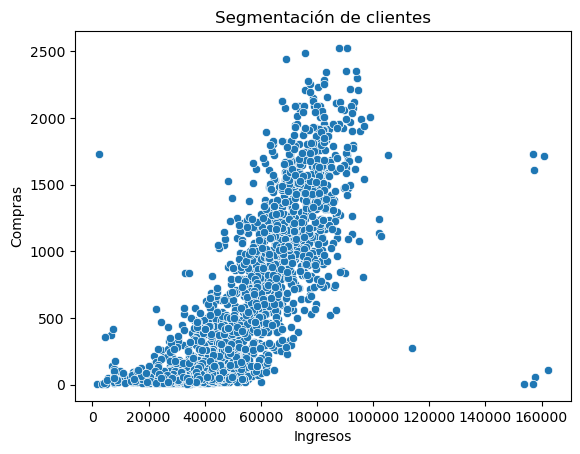

In [41]:
sns.scatterplot(data=df,x='Income',y='Spent')
plt.title("Segmentación de clientes")
plt.xlabel('Ingresos')
plt.ylabel('Compras')
plt.show()

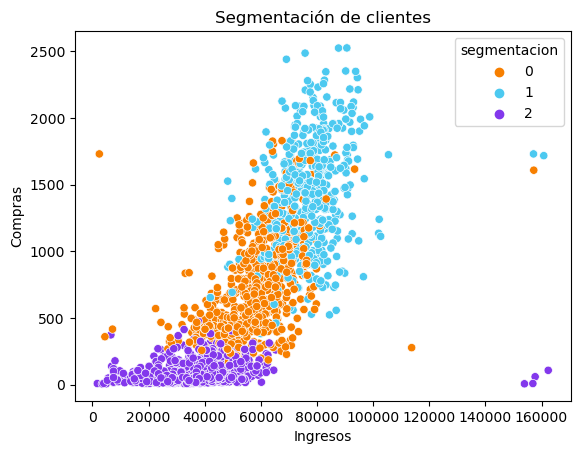

In [42]:
sns.scatterplot(data=df,x='Income',y='Spent',hue='segmentacion',palette=['#f77f00','#4cc9f0','#8338ec'])
plt.title("Segmentación de clientes")
plt.xlabel('Ingresos')
plt.ylabel('Compras')
plt.show()

In [50]:
x = np.arange(-10,10,100)
print(x)

[-10]


In [69]:
rl = pd.DataFrame({
    "habitaciones":[2,3,2,3,4,2,1,5,2,3,2,3,4,2,1,5],
    "precio":[600,750,580,720,800,620,300,950,500,650,480,620,700,520,200,850]
})

## Modelo supervisado regresion lineal

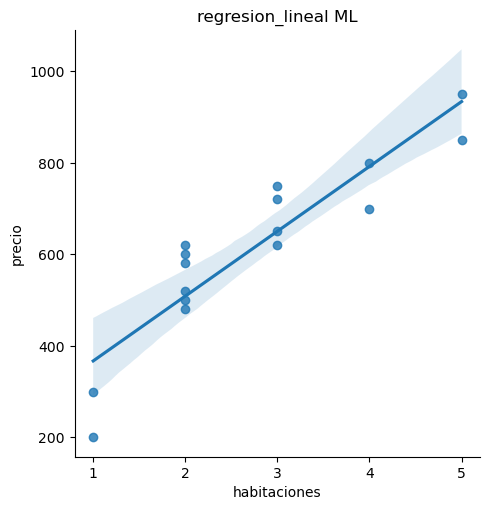

In [72]:
sns.lmplot(data=rl,x="habitaciones",y="precio")
plt.xticks([1,2,3,4,5])
plt.title('regresion_lineal ML')
plt.show()